# Non-differentiable convex optmisation. 

Non-differentiable functions complicate things because we know longer have acces to gradient. However there is a nice generalisation of the gradient to non-differentiable functions called 'subgradient'. 

First need a non-differntiable example - pieceiwse linear minimization: 

\begin{align*}
\text{minimize } & max_{i=1,...,m}(a_i^Tx +b_i) \\
\end{align*}

In [57]:
import numpy as np
import cvxpy as cp

m = 3
n = 2

np.random.seed(4)
A = np.random.uniform(0,1,size=(m,n))
b = np.random.uniform(0,1,size=(m))
c = -A.T * np.random.uniform(0,1,size=(m))
A.shape, b.shape, c.shape


x = cp.Variable(n)
obj = cp.Minimize(cp.max(A @ x + b))
constraints = [x >= 0, x <= 1]
problem = cp.Problem(obj, constraints)
problem.solve()


0.9762744548110022

(2,)

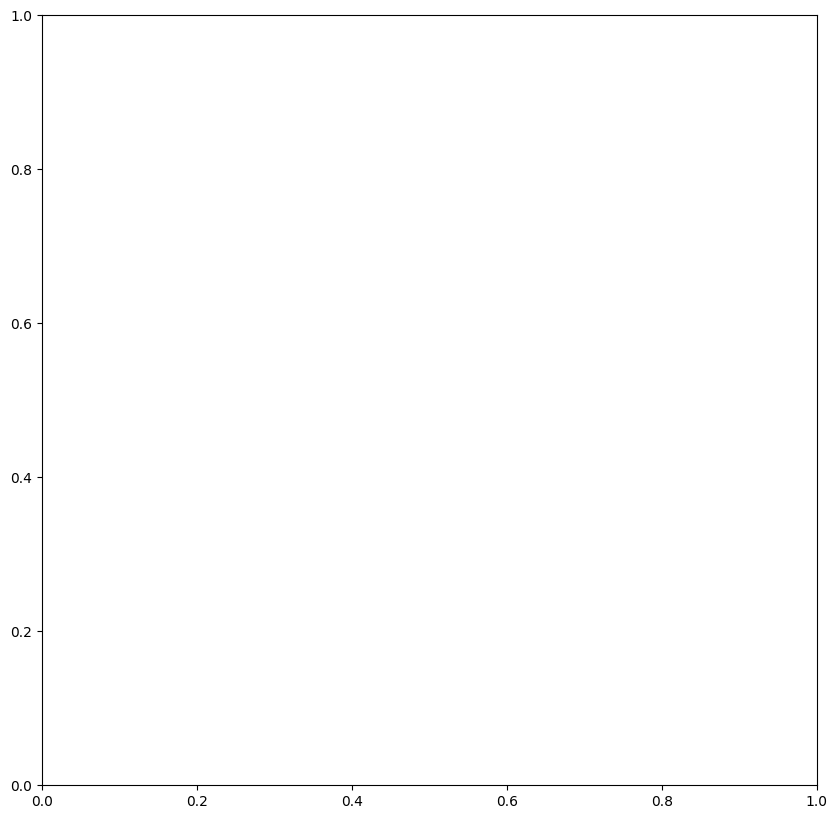

In [45]:
import matplotlib.pyplot as plt 

fig, axs = plt.subplots(1,1,figsize=(10,10))

#axs.plot(m[0,0], m[0,1])

In [29]:
import numpy as np
import cvxpy as cp

# Define the problem parameters
n = 10
m = 100
x = cp.Variable(n)
a = np.random.uniform(-1, 1, size=(n,))
b = np.random.uniform(-1, 1, size=(n,))
c = np.random.uniform(-1, 1, size=(n,))

# Define the piecewise linear function
pw_linear = cp.max(cp.hstack([a[i] * x[i] + b[i] for i in range(n)]) + c)
print(pw_linear)

# Define the optimization problem
objective = cp.Minimize(pw_linear)
problem = cp.Problem(objective)
problem.solve()

# Print the optimal value of x and the minimum value of the objective function
print("Optimal value of x: ", x.value)
print("Minimum value of the objective function: ", problem.value)

max(Hstack(reshape(-0.1428571792845823 @ var145[0] + -0.6873890920703163, (1,), F), reshape(0.20822927925459545 @ var145[1] + 0.9525693604060312, (1,), F), reshape(0.25099797407574775 @ var145[2] + 0.7083166433892383, (1,), F), reshape(-0.7660314818739267 @ var145[3] + 0.6132526339119937, (1,), F), reshape(0.9323387805131917 @ var145[4] + 0.7043422739723386, (1,), F), reshape(-0.0359329647990978 @ var145[5] + -0.9368912207774072, (1,), F), reshape(-0.5358888583619212 @ var145[6] + 0.31453930842260136, (1,), F), reshape(-0.38297884859238285 @ var145[7] + 0.4065414082980843, (1,), F), reshape(-0.580791193012266 @ var145[8] + -0.668261526423582, (1,), F), reshape(-0.8874669129453487 @ var145[9] + 0.20449315353456332, (1,), F)) + [ 0.96968763 -0.08191208  0.7026231  -0.09862232  0.17781656 -0.0738109
 -0.599862    0.8761549   0.05870944  0.05248876], None, False)
Optimal value of x:  None
Minimum value of the objective function:  -inf


## Example problem: PSD matrix completion : 

For alternating projections algo? 

In [21]:
# http://web.stanford.edu/class/ee364b/lectures/subgrad_method_matlab/subgrad_method_mtx_complete.m


# random psd matrix
n = 50 #  matrix size
p = 500 # number missing entries 
A = np.random.normal(0,1,size=(n,n))
X = A.T @ A

# Random sparsity pattern. make sure sparity pattern is symmeteric and has ones on diag
S = np.random.normal(0,1,size=(n,n))
S = (S + S.T) + np.eye(n) > 1

# zero missing elments
X *= S
I = np.nonzero(X)
V = X[I]
